<h1>Fietsen in Friesland!</h1>
<hr>
Als het om fietsen gaat, heeft Friesland één van de meest afwisselende landschappen van de Nederlandse provincies. Mooie landschappen als de Friese Wouden, de Friese meren, het Waddengebied en de vele terpen die er in de provincie te vinden zijn. Naast dit prachtige natuur, kom je langs historische dorpen en de oude 11 steden. Dit allemaal afgewisseld door enorme open vlaktes, waar het voor mijn gevoel altijd waait. Niet voor niets de "dutch mountains" genoemd.

Elke keer als ik weer op de fiets stap, eerst bekijken wat de windrichting is, om zo lekker tegen de wind in te beginnen aan je ronde. Voor mijn gevoel waaide het 's middags altijd harder dan 's morgens. Ik heb meer dan eens gedacht toen ik weer met een ronde van 100km bezig was: "Wat zou nu de beste tijd zijn om te vertrekken, om het meeste profijt van de wind te hebben?". 

Dit leek mij een mooie eerste opdracht om uit te werken.

**Stelling:** " 's Middags waait het meestal harder dan 's morgens ".

<p><img src="https://www.desintnykster.nl/images/fot/19/06/201116_novemberstorm_166.jpg" align=left></p>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

**Daarbij wil ik vragen beantwoorden zoals:**
- wat is de gemiddelde windkracht over een jaar gezien?
- wat is de gemiddelde windkracht over een week gezien?
- wat is de gemiddelde windkracht over een dag gezien?
- Wat is de meest voorkomende windrichting en de windkracht per windrichting?

Wanneer deze gegevens bekend zijn, kunnen we berekenen wat de meest efficiëntste tijd is om een ronde van 100km te fietsen, uitgaande van 25km per uur.

**Uitgangspunten:**
- Morgen: 0600 - 1200
- Middag: 1200 - 1800
- Avond: 1800 - 2200
- Nacht: 2200 - 0600

<hr>Deze dataset gebruikt KNMI data, gemeten in Leeuwarden!<br>
Data is van 1-1-2000 tot 1-1-2021 en wordt vanuit een dataset in Dataiku geladen.

Dataset download link: http://projects.knmi.nl/klimatologie/uurgegevens/selectie.cgi<hr>

Als eerste gaan we de data laden en bekijken. <br>*Note:* In Jupyter Notebooks gebruiken we <code>display()</code> in plaats van <code>print()</code>, omdat dat een mooiere weergave geeft.<hr>

Er zijn diverse mogelijkheden om dergelijk vragen uit te werken. Ik heb diverse methoden gebruikt en toegepast. Aangezien ik 'lerende' ben, heb ik zoveel mogelijk verschillende methodes gebruikt. Doel is namelijk voor mijzelf, om zoveel mogelijk toegepaste kennis op te kunnen doen. Voor mij is dat natuurlijk prachtig om te kunnen combineren met mijn andere hobby, namelijk het fietsen.

In [1]:
%pylab inline

import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
from datetime import datetime

# Import matplotlib en seaborn om grafieken te maken
import matplotlib.pyplot as plt
import seaborn as sns

# Zet style voor bepaalde weergave van de grafieken
plt.style.use('seaborn')

# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("KNMI_hourly")
df = mydataset.get_dataframe()

Populating the interactive namespace from numpy and matplotlib


<h2>1. Wat betekend deze data?</h2>

<h3>1.1 Data bekijken.</h3>

Eerste stap is het bekijken en transformeren van de data.<br>
Wat voor data is geïmporteerd? En wat hebben we daarvan nodig?

<hr>

In de <code>.info()</code> is te zien dat alle kolommen op T10N na, géén null waardes hebben. Maar wat betekenen nu al die kolommen? Op de website van de KNMI, worden alle definities gegeven.

<br>Wij beperken ons tot de volgende kolommen voor deze vraagstelling:
- **YYYYMMDD** = datum (YYYY=jaar,MM=maand,DD=dag)<br>
- **HH** = tijd (HH=uur, UT.12 UT=13 MET, 14 MEZT. Uurvak 05 loopt van 04.00 UT tot 5.00 UT<br>
- **DD** = Windrichting (in graden) gemiddeld over de laatste 10 minuten van het afgelopen uur (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil *990=veranderlijk*<br> 
- **FH** = Uurgemiddelde windsnelheid (in 0.1 m/s)<br> 

In [2]:
# Display de eerste 5 regels van de DataFrame
display(df.head()) #tail() bekijk je de laatste 5 regels mee

# Alle kolommen met informatie over o.a. null waarders (NaN)
display(df.info())

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,P,VV,N,U,WW,IX,M,R,S,O,Y
0,270,20000101,1,210,50,40,80,42,NaN,42,0,0,0,0,10203,14.0,8.0,100,28.0,1.0,1.0,0.0,0.0,0.0,0.0
1,270,20000101,2,200,50,40,70,43,NaN,43,0,0,0,0,10200,22.0,8.0,100,10.0,1.0,0.0,0.0,0.0,0.0,0.0
2,270,20000101,3,210,50,50,70,45,NaN,45,0,0,0,0,10198,19.0,8.0,100,10.0,1.0,0.0,0.0,0.0,0.0,0.0
3,270,20000101,4,200,50,40,80,45,NaN,45,0,0,4,3,10194,11.0,8.0,100,60.0,1.0,0.0,1.0,0.0,0.0,0.0
4,270,20000101,5,200,50,50,80,46,NaN,46,0,0,5,4,10189,9.0,8.0,100,60.0,1.0,1.0,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184104 entries, 0 to 184103
Data columns (total 25 columns):
STN         184104 non-null int64
YYYYMMDD    184104 non-null int64
HH          184104 non-null int64
DD          184104 non-null int64
FH          184104 non-null int64
FF          184104 non-null int64
FX          184104 non-null int64
T           184104 non-null int64
T10N        30684 non-null float64
TD          184104 non-null int64
SQ          184104 non-null int64
Q           184104 non-null int64
DR          184104 non-null int64
RH          184104 non-null int64
P           184104 non-null int64
VV          184020 non-null float64
N           146725 non-null float64
U           184104 non-null int64
WW          68349 non-null float64
IX          184103 non-null float64
M           146768 non-null float64
R           146768 non-null float64
S           146768 non-null float64
O           146768 non-null float64
Y           146768 non-null float64
dtypes: float64(10), 

None

<h3>1.2 Data Transformeren.</h3>

Niet alle beschikbare data is even bruikbaar om de stelling uit te werken. Na het bekijken van de data met de bijbehorende verklaring, worden de dikgedrukte kolommen in de verklaring hierboven meegenomen in een nieuwe dataframe.

kolom DD heeft voor de windrichting nog een waarde: 990 = veranderlijk. Mijn gebruikte methode om met gemiddelde te gaan werken, gooit deze 990 waarde roet in het eten. Daarom besloten om alle 990 regels te verwijderen.

In [4]:
regels = len(df.index)
veranderlijk = df[df['DD'] == 990].count()[2] # Alle regels met de waarde 990 tellen van de derde kolom: 'DD'.
verhouding_veranderlijk = veranderlijk / regels * 100

print('Van de totaal {} regels, zijn er {} regels die de waarde 990 hebben. Dat is {}% van het totaal.'
      .format(regels, veranderlijk, round(verhouding_veranderlijk, 2)))

windstil = df[df['DD'] == 0].count()[2] # Alle regels met de waarde 990 tellen van de derde kolom: 'DD'.
verhouding_windstil = windstil / regels * 100

print('Van de totaal {} regels, zijn er {} regels die de waarde 0 hebben. Dat is {}% van het totaal.'
      .format(regels, windstil, round(verhouding_windstil, 2)))

Van de totaal 184104 regels, zijn er 1675 regels die de waarde 990 hebben. Dat is 0.91% van het totaal.
Van de totaal 184104 regels, zijn er 1377 regels die de waarde 0 hebben. Dat is 0.75% van het totaal.


In [5]:
# Alle regels met de waarde 990 verwijderen.
df = df[df['DD'] != 990]
# Alle regels met de waarde 0 verwijderen.
df = df[df['DD'] != 0]

In [6]:
# Om van alle potenties gebruik te maken qua datums en tijd, wordt de YYYYMMDD kolom aangepast naar een datetime kolom. 
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'].astype(str), format='%Y%m%d')

In [7]:
# Alle eerder genoemde kolommen in een nieuwe dataframe laden.
wind_df = df[['YYYYMMDD', 'HH', 'DD', 'FH']]

In [8]:
# Nieuwe dataframe bekijken
display(wind_df.info())
display(wind_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181052 entries, 0 to 184103
Data columns (total 4 columns):
YYYYMMDD    181052 non-null datetime64[ns]
HH          181052 non-null int64
DD          181052 non-null int64
FH          181052 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.9 MB


None

,YYYYMMDD,HH,DD,FH
60320,2006-11-18,9,210,40
134278,2015-04-26,23,360,20
88786,2010-02-16,11,160,70
176394,2020-02-14,19,180,60
55152,2006-04-17,1,200,20


<h3>1.3 Uitgangspunten creeëren.</h3>

We hebben nu een DataFrame geladen van KNMI die per uur een waarde heeft, over de laatste 20 jaren.
Van deze DataFrame zijn de kolommen datum, uur, windrichting en windkracht bewaard en opgeschoond.
<hr>
Om deze DataFrame echt goed te gebruiken gaan we kolommen toevoegen die we maken vanuit bestaande data:
- Dagdelen
- Windrichting als windroos
- datum als een echte 'datum-veld'
- week, maand en jaar

Voor de leesbaarheid worden de bestaande kolom 'index' namen veranderd naar begrijpbare termen.

In [ ]:
# Nieuwe kolom harder maken en dan een 'string' toevoegen welk dagdeel het hartste waait.
wind_df.loc[wind_df['HH'].between(1, 6), 'dagdeel'] = 'nacht'
wind_df.loc[wind_df['HH'].between(7, 12), 'dagdeel'] = 'morgen'
wind_df.loc[wind_df['HH'].between(13, 18), 'dagdeel'] = 'middag'
wind_df.loc[wind_df['HH'].between(19, 22), 'dagdeel'] = 'avond'
wind_df.loc[wind_df['HH'].between(23, 24), 'dagdeel'] = 'nacht'

In [11]:
# kolom namen aanpassen naar begrijpbare namen
wind_df = wind_df.rename(columns = {'YYYYMMDD': 'date', 'FH': 'kracht', 'DD': 'richting', 'HH': 'uur'}, inplace = False)

In [12]:
# Datum een dag van de week geven
wind_df['dag'] = wind_df['date'].dt.day_name()

In [13]:
# functie om de windrichting om te zetten naar tekst en zo 16 'groepen' te maken
def wind_deg_to_str(deg):
        arr = ['NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N']
        return arr[int(abs((deg - 11.25) % 360)/ 22.5)]
    
# functie om maand in de verkorte notatie neer te zetten
def maand_aanpassen(maand):
        return maand.strftime('%b')
    
# functie om jaartal weer te geven
def jaar_weergeven(jaar):
        return jaar.strftime('%Y')

# functie om weeknummer weer te geven
def week_weergeven(week):
        return week.strftime('%V')    

In [14]:
#Nieuwe kolom toevoegen dmv het gebruik van een functie
wind_df['maand'] = wind_df.apply(lambda row: maand_aanpassen(row.date), axis=1)

In [15]:
#Nieuwe kolom toevoegen dmv het gebruik van een functie
wind_df['jaar'] = wind_df.apply(lambda row: jaar_weergeven(row.date), axis=1)

In [16]:
#Nieuwe kolom toevoegen dmv het gebruik van een functie
wind_df['windroos'] = wind_df.apply(lambda row: wind_deg_to_str(row.richting), axis=1)

In [17]:
#Nieuwe kolom toevoegen dmv het gebruik van een functie
wind_df['week'] = wind_df.apply(lambda row: week_weergeven(row.date), axis=1)

In [21]:
wind_df.sample(5)

,date,uur,richting,kracht,dagdeel,dag,maand,jaar,windroos,week
117067,2013-05-09,20,180,30,avond,Thursday,May,2013,S,19
62928,2007-03-07,1,210,30,nacht,Wednesday,Mar,2007,SSW,10
105661,2012-01-20,14,300,60,middag,Friday,Jan,2012,WNW,03
134364,2015-04-30,13,240,90,middag,Thursday,Apr,2015,WSW,18
37149,2004-03-27,22,250,40,avond,Saturday,Mar,2004,WSW,13


<h2>2. Uitwerking stelling.</h2>

Met de gecreëerde DataFrame: wind_df, kunnen we nu alle vragen beantwoorden die we kunnen bedenken binnen dit onderwerp.

Om te beginnen met de **Stelling:** <br>
" 's Middags waait het meestal harder dan 's morgens ".
<br><hr>
Ik heb gekozen om dit weer te geven in een cirkel diagram. Nu zijn de meningen verdeeld in de wereld van data visualisatie over het gebruik van een cirkel diagram, maar in dit geval is het wel in één oogopslag duidelijk.

**Resultaat**: Over de laatste 20 jaren, waaide het 'smiddags in 47% van de dagen het hardste. 's Morgens 29% en 24% voor de avond en nacht gecombineerd. <br><br>

De **stelling** dat het 's middags meestal het hardste waait is **waar**.

Gemiddeld over de dag genomen, heeft **vrijdag** de minste wind, en **maandag** de meeste wind.

/home/dataiku/dss/code-envs/python/Test-Michel/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7f9add515860> has a label of '_Hidden' which cannot be automatically added to the legend.
/home/dataiku/dss/code-envs/python/Test-Michel/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7f9add515f60> has a label of '_Hidden' which cannot be automatically added to the legend.
/home/dataiku/dss/code-envs/python/Test-Michel/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7f9add52b6a0> has a label of '_Hidden' which cannot be automatically added to the legend.
/home/dataiku/dss/code-envs/python/Test-Michel/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7f9ade7034e0> has a label of '_Hidden' which cannot be

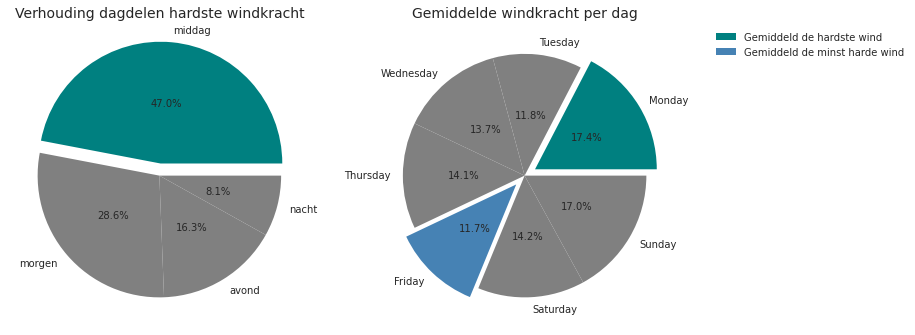

In [22]:
#Per dag en dagdeel het gemiddelde nemen. Deze dan in kolommen naast elkaar plaatsen
krachtigste_dagdeel = wind_df.groupby(['date', 'dagdeel'])['kracht'].mean().unstack()
#Per rij de kolom index nemen van de hoogste waarde (hardste windkracht), en al deze waardes optellen.
krachtigste_dagdeel = krachtigste_dagdeel.idxmax(axis=1).value_counts()

#per dag (52 weken * 20 jaar) de hardst waaiende dagdeel bepalen
krachtigste_dag = wind_df.groupby(['jaar','week', 'dag'])['kracht'].mean().unstack()
krachtigste_dag = krachtigste_dag.idxmax(axis=1).value_counts()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
krachtigste_dag = krachtigste_dag.reindex(days)

# Pie chart
pie, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,6])
labels = krachtigste_dagdeel.iloc[:].index.tolist()
clrs = ['grey' if (x < max(krachtigste_dagdeel)) else 'teal' for x in krachtigste_dagdeel ] #Kleur visualisatie!
explode = [0.1 if (x == 'teal') else 0 for x in clrs] # Explode de slice die je wilt.
ax[0].pie(x=krachtigste_dagdeel, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5, colors=clrs)
ax[0].set_title("Verhouding dagdelen hardste windkracht", fontsize=14);

# Pie chart
labels = krachtigste_dag.iloc[:].index.tolist()
clrs = ['teal' if x == max(krachtigste_dag) else 'steelblue' if x == min(krachtigste_dag) else 'grey' for x in krachtigste_dag]
explode = [0.1 if (x == 'teal' or x == 'steelblue') else 0 for x in clrs] # Explode de slice die je wilt.
ax[1].pie(x=krachtigste_dag, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5, colors=clrs)
ax[1].set_title("Gemiddelde windkracht per dag", fontsize=14);
ax[1].legend(labels = ['Gemiddeld de hardste wind', '_Hidden', '_Hidden', '_Hidden', 'Gemiddeld de minst harde wind', '_Hidden', '_Hidden'], loc='upper left', bbox_to_anchor=(1.1,1))

plt.show()

<h2>3. Windracht door het jaar heen.</h2>

Hoe verhoudt de windkracht zich over de verschillende maanden heen?<br>

In de grafieken zien we dat in de winter maanden gemiddeld het hardste waait. Tegenovergesteld, in de zomer juist het minst hard.<br>
Met **januari** het meeste wind en **augustus** het minste.

Voordat ik dit inzichtelijk had gemaakt, zou ik voor mijzelf zeggen dat de *herfst* de meeste wind zou hebben, maar volgens de grafieken toch echt in de *winter*.

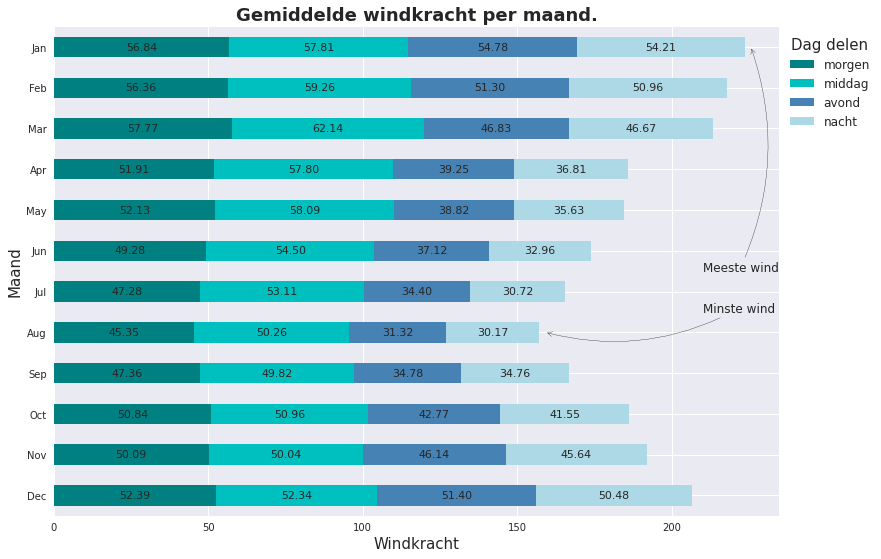

In [23]:
# Gemiddelde per maand
per_maand = wind_df.groupby(['maand', 'dagdeel'])['kracht'].mean().unstack()

# Verander de maanden op logische volgorde
volgorde = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
per_maand = per_maand.reindex(volgorde)
per_maand = per_maand[['morgen', 'middag', 'avond', 'nacht']]


# Stacked horizentale grafiek maken
ax = per_maand.plot.barh(stacked=True, color=['teal', 'c', 'steelblue', 'lightblue'], figsize = (13,9))
ax.set_title('Gemiddelde windkracht per maand.',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Windkracht', fontsize = 15)
ax.set_ylabel('Maand', fontsize = 15)

# Waardes aan de grafiek toevoegen
for rect in ax.patches:
    # Zoek alles in de grafiek
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # Omdat het een horizontale bar is, wordt de breedte gebruikt als waarde.
    label_text = f'{width:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # Alleen weergeven als de waarde hoger dan 0 is. Height en width aanpassen adv hori of vert.
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)

# aangeven wat de max en min is in de grafiek        
max_maand_x = max(per_maand.sum(axis=1))+2
min_maand_x = min(per_maand.sum(axis=1))+2

#max_maand_y = per_maand['tot'].argmax() #mogelijk de y-as waarde nog automatiseren
#min_maand_y = per_maand['tot'].argmin()

# Text met pijl. Zijn veel verschillende stylen in.
ax.annotate('Meeste wind', xy=((max_maand_x), 0), xytext=(210,5.5), arrowprops=dict(arrowstyle='->', 
                                                            connectionstyle='arc3, rad=+0.2'), fontsize=12) 
ax.annotate('Minste wind', xy=((min_maand_x), 7), xytext=(210,6.5), arrowprops=dict(arrowstyle='->', 
                                                            connectionstyle='arc3, rad=-0.2'), fontsize=12) 
                
labels = per_maand.columns.values.tolist()
    
# Add a legend
ax.legend(title_fontsize=15, fontsize = 12, loc='upper left', bbox_to_anchor=(1,1), 
              ncol=1, title="Dag delen", labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom

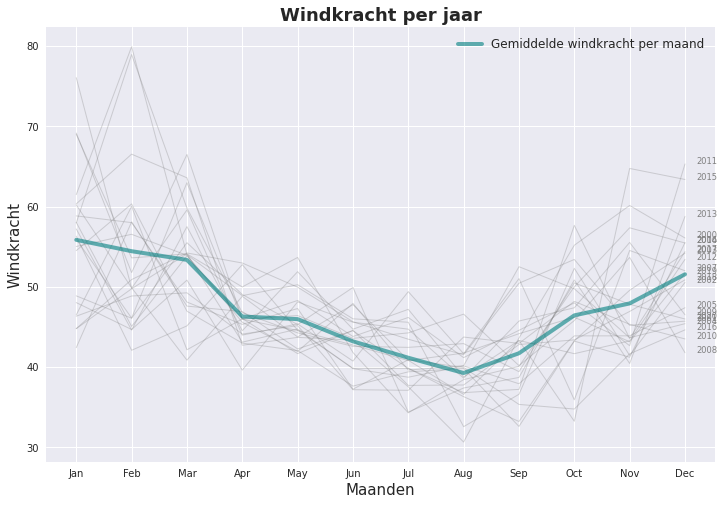

In [25]:
#gemiddelde kracht per jaar en maand in een tijdelijke df
per_jaar = wind_df.groupby(['jaar', 'maand'])['kracht'].mean()
#gecombineerde index splitsen
per_jaar = per_jaar.unstack()

#Index aanpassen
volgorde = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
per_jaar = per_jaar[volgorde]

# Voor gebruik alle jaren, transpose maakt van rijen kolommen en visa versa 
per_jaar = per_jaar.transpose()
per_jaar = per_jaar.reset_index()

# Voor gemiddelde plot line
jaar_gem = wind_df.groupby('maand')['kracht'].mean()
jaar_gem = jaar_gem.reindex(volgorde)

# Multi line plot maken
plt.figure(figsize=(12,8))
plt.title('Windkracht per jaar',fontsize = 18, fontweight='bold' )
plt.xlabel('Maanden', fontsize = 15)
plt.ylabel('Windkracht', fontsize = 15)

# Plot een naam geven
plot_naam = per_jaar.columns.tolist()
plot_naam.remove('maand')

# multiple line plot
num=0
for column in per_jaar.drop('maand', axis=1):
    plt.plot(per_jaar['maand'], per_jaar[column], marker='', color='grey', linewidth=1, alpha=0.3, label='_Hidden')
    plt.text(11.2, per_jaar[column].tail(1), plot_naam[num], horizontalalignment='left', size='small', color='grey')
    num+=1

    # Gemiddelde line plot
plt.plot(jaar_gem, marker='', color='teal', linewidth=4, alpha=0.6, label='Gemiddelde windkracht per maand')
plt.legend(fontsize = 12, loc='upper right')

<h2>4. Wat is de windkracht over een dag heen?</h2>

Over de weken heen gezien, zien we dezelfde trend terug. Namelijk dat rond **1300** & **1400** uur de piek qua windkracht ligt.

In [28]:
per_uur = wind_df.groupby(['uur', 'week'])['kracht'].mean()
per_uur = per_uur.unstack()
per_uur = per_uur.reset_index()

# Voor gemiddelde plot line
uur_gem = wind_df.groupby('uur')['kracht'].mean()

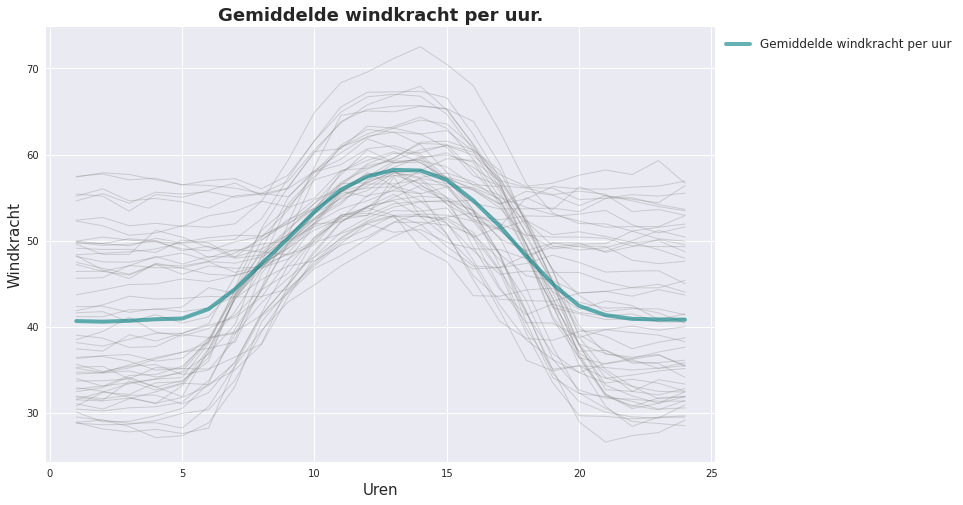

In [29]:
# Multi line plot maken
plt.figure(figsize=(12,8))
plt.title('Gemiddelde windkracht per uur.',fontsize = 18, fontweight='bold' )
plt.xlabel('Uren', fontsize = 15)
plt.ylabel('Windkracht', fontsize = 15)

#multiple line plot
for column in per_uur.drop('uur', axis=1):
    plt.plot(per_uur['uur'], per_uur[column], marker='', color='grey', linewidth=1, alpha=0.3, label='_hidden')

# Gemiddelde line plot
plt.plot(uur_gem, marker='', color='teal', linewidth=4, alpha=0.6, label='Gemiddelde windkracht per uur')   

plt.legend(title_fontsize=15, fontsize = 12, loc='upper left', bbox_to_anchor=(1,1), 
              ncol=1)

<h2>5. Windrichtingen</h2>

Zelf vond ik het interessant om inzichtelijk te hebben wat de verhoudingen zijn tussen de windrichtingen. Als ik weer eens het weer aan het bekijken was qua windrichting, had ik vaak het gevoel dat het tussen het zuiden en westen kwam.<hr>

Uit onderstaande windroos blijkt het volgende:

<code>display(aantal_windrichting.nlargest(5))</code>
- S
- SSW
- W
- SW
- WSW

<code>display(windrichting_kracht.nlargest(5))</code>
- WSW:    58.33
- W:      54.57
- SW:     53.30
- NW:     52.31
- NNW:    49.61

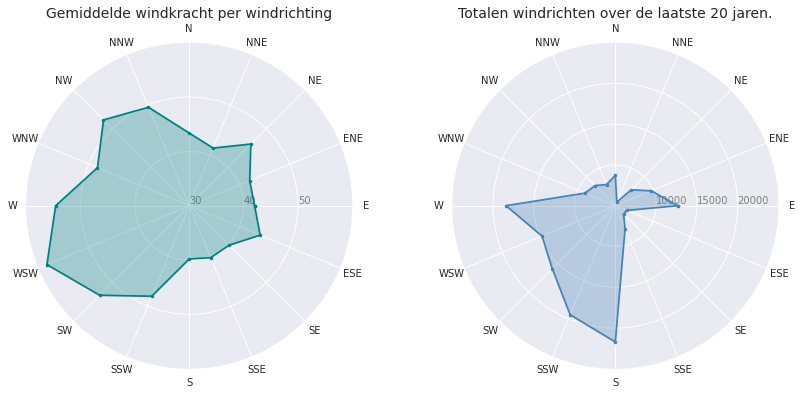

In [30]:
#Aantallen tellen per richting
aantal_windrichting = wind_df['windroos'].value_counts()

volgorde = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
aantal_windrichting = aantal_windrichting.reindex(volgorde)

#Gemiddelde kracht per richting bepalen
windrichting_kracht = wind_df.groupby('windroos')['kracht'].mean()
windrichting_kracht.iloc[:].values.tolist()

volgorde = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
windrichting_kracht = windrichting_kracht.reindex(volgorde)


#plot
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(121, polar='True')

#categorien verdelen (windrichtingen)
categories = windrichting_kracht.iloc[:].index.tolist()
N = len(categories)

#Waardes plotten in de polar plot
values= windrichting_kracht.iloc[:].values.tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

#plot
plt.polar(angles, values, marker = '.', color='teal')
plt.fill(angles, values, alpha=0.3, color='teal')

#x and y ticks
plt.xticks(angles[:-1], categories)

#labels
ax.set_rlabel_position(0)
plt.yticks([30, 40, 50], color='grey', size=10)
plt.ylim(30,60)
ax.set_title("Gemiddelde windkracht per windrichting", fontsize=14)

#2e plot
ax = plt.subplot(122, polar='True')

#categorien verdelen (windrichtingen)
categories = aantal_windrichting.iloc[:].index.tolist()
N = len(categories)

#Waardes plotten in de polar plot
values= aantal_windrichting.iloc[:].values.tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

#plot
plt.polar(angles, values, marker = '.', color='steelblue')
plt.fill(angles, values, alpha=0.3, color='steelblue')

#x and y ticks
plt.xticks(angles[:-1], categories)

#labels
ax.set_rlabel_position(0)
plt.yticks([10000, 15000, 20000], color='grey', size=10)
plt.ylim(5000,25000)
ax.set_title("Totalen windrichten over de laatste 20 jaren.", fontsize=14)

plt.show()

<h2>6. Rit van 100km?</h2>

Wanneer zou het beste moment zijn om op de fiets te stappen?
Ik mag graag een rit van 100km maken. Tijdens het fietsen heb ik er vaak over nagedacht wat nu het beste moment zou zijn om te starten, om zoveel mogelijk 'voordeel' van de wind te hebben.
<hr>
- uitgangspunt van 25km/u. 
- beperken tot de zaterdag en zondag. 
- uitgaande dat de wind niet draait. 
<hr>
**Zaterdag** zou op basis van de gemiddelde waarde van de afgelopen 20 jaar, het beste om **7 uur** worden gestart en **zondag** om **8 uur**.
<hr>
*Note: Deze vraagstelling zou nog veel verder uitgediept kunnen worden. Zou zou je per week of per maand een geschikte tijd kunnen berekenen. Hiervoor zou een mooie functie geschreven kunnen worden. Wellicht voor een volgende stap*

In [32]:
# Functie om de beste uren te bepalen op basis van een lijst met 24 uren.
# Funtie beperkt zich tot 2200 savonds. 
def beste_uren(uren):
    # 24+1 is niet meegenomen, maar daar gaan we toch niet fietsen!
    uren_sum = [(x + y) for (x, y) in zip(uren, uren[1:])]
    # Laatste 2 waardes worden ook niet berekend, omdat we bij 3 beginnen, dus totaal 21 uren berekend.
    uren_min = [(x - y) for (x, y) in zip(uren_sum[0:22], uren_sum[2:24])]
    # Index waarde representeerd eerste uur van de berekening. (index 7 = 8uur)
    uren_index = uren_min.index(min(uren_min))
    
    return [uren_index+1, uren_index+2, uren_index+3, uren_index+4]

In [42]:
# nieuwe DataFrame maken van de gemiddelde windkracht op basis van dagen van de week en over de uren van een dag
rond_rit = wind_df.groupby(['uur', 'dag'])['kracht'].mean()
rond_rit = rond_rit.unstack()
rond_rit = rond_rit.reset_index()
rond_rit = rond_rit.set_index('uur')

#waardes uit de DataFrame in een list variabele
zaterdag = rond_rit['Saturday'].values.tolist()
# aanroepen van de gemaakte functie beste_uren
zaterdag = beste_uren(zaterdag)
zondag = rond_rit['Sunday'].values.tolist()
zondag = beste_uren(zondag)

In [40]:
print('Op {} kan je gemiddeld gezien het beste gaan fietsen met wind tegen om {} en {} uur.\n\
Om {} en {} uur heb je dan met het grootste verschil wind mee terug.'
      .format('zaterdag', zaterdag[0], zaterdag[1], zaterdag[2], zaterdag[3]))

print('\n\nOp {} kan je gemiddeld gezien het beste gaan fietsen met wind tegen om {} en {} uur.\n\
Om {} en {} uur heb je dan met het grootste verschil wind mee terug.'
      .format('zondag', zondag[0], zondag[1], zondag[2], zondag[3]))

Op zaterdag kan je gemiddeld gezien het beste gaan fietsen met wind tegen om 7 en 8 uur.
Om 9 en 10 uur heb je dan met het grootste verschil wind mee terug.


Op zondag kan je gemiddeld gezien het beste gaan fietsen met wind tegen om 8 en 9 uur.
Om 10 en 11 uur heb je dan met het grootste verschil wind mee terug.


<h2>7. Conclusie</h2>

Grote kans dat het **'s middags harder waait** dan 's morgens, dus wil je minder last hebben van de wind, **begin op tijd!** Voor de 'mooi weer' fietsers ideaal dat het in de zomer minder hard waait.

Dit zijn allemaal nog simpele ‘weetjes’, maar het was voor mij een leuke ervaring om hetgeen toe te kunnen passen. 
<hr>
Volgende stap is het ontdekken van **machine learning** (voorspellende modellen). Wie weet kunnen we een model maken die kan voorspellen wanneer het voor mij de ideale tijd is om de 100km te gaan rijden. Aangezien ik die elke maand 1x wil doen, heb ik genoeg gelegenheden om dit te onderzoeken.
<hr>
